One of the talks looked at whether we could determine if a data point is within a set, for which we have the means of each parameter, where the parameters are binary (-1 or 1) classifications. For example:
    
    Person  HighBloodPressure  Born<1990  Male  HasTreatment  Smokes  HasConditionX  etc...
      A             -1             -1      +1         -1        +1         +1         ...
      B             +1             +1      -1         -1        -1         -1 ... etc
      C             :

The mean (or sum) of the columns can be used to decide if a random person is in the set, given we know their parameters.

(sorry, my notation's messed up and doesn't match the code)

If data point *is* in dataset, we would expect the covariance to equal ... 

$< \mathbf{t} . \mathbf{m} >$

where $\mathbf{t}$ is the test point and $\mathbf{m}$ is the mean.

$\mathbf{m} = {{\sum_{j \in D} X_j} \over N}$

Taking the datapoint out of the summation for a moment:

$\mathbf{m} = {t \over N} + {{\sum_{j \in D/t} X_j} \over N}$

Assuming iid, the covariance between the test point and these two terms is:

$< \mathbf{t} . {t \over N} >$

and

$< \mathbf{t} . {{\sum_{j \in D/t} X_j} \over N} >$

this second term is zero, as we assume independence between data points, leaving just:

${t^2 \over N}$

Given the points are 1 or -1, this is simply:

$1/N$

So if the data point *is* in the data we expect the covariance to be 1/N, otherwise zero.

Given the covariance is c, what is the probability that the data point is in data set?

The covariance calculation is just the sum over -1 or +1 values. So the distance from the expected mean should be 1; so the expected covariance is 1 (and as we're averaging over p parameters, then over n). So the difference between the two distributions is approximately N(1/N,1/Np) - N(0,1/Np) = N(1/N,2/Np) (this is approximate as we should probably take into account a slight change in N if a feature is known).




In [ ]:
import numpy as np

def genCov(inSet,n,p):
    #n=number of samples in dataset
    #p=number of parameters
    a = np.random.rand(n+1,p) #dataset generation
    a[a<0.5] = -1
    a[a>=0.5] = 1
    
    #do we sample our test point from the data?
    if inSet:
        testPoint = a[0,:]
    else:
        testPoint = a[-1,:]
        
    a = a[0:-1,:] #get rid of the last row
    
    m = np.mean(a,0) #find the mean,
    return np.mean(testPoint*m) #return the covariance across parameters between the test point and the mean

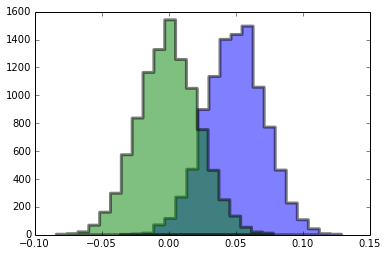

In [2]:
n=20
p=100
mIn = [genCov(True,n,p) for x in range(10000)]
mOut = [genCov(False,n,p) for x in range(10000)]

import matplotlib.pyplot as plt;
%matplotlib inline
plt.hist(mIn,alpha=0.5,histtype='stepfilled',lw=3,bins=20);
plt.hist(mOut,alpha=0.5,histtype='stepfilled',lw=3,bins=20);


In [3]:
from scipy.stats import norm
1-norm.cdf((1./n)/np.sqrt(2./(n*p)))

0.056923149003329065

In [4]:
count = 0
for i,o in zip(mIn,mOut):
    if (i<=o):
        count+=1.
count/len(mIn)
        

0.0548

Just a ballpark, how often we'll be wrong, or something. (ugh, frequentist!).

###Genetics etc

- sparse binary vectors
- fingerprinting
- human genome fingerprinting
- what segments of the genome are good for 'barcoding' people.
- Personal Genome Project
- Parity Check
- SECURE MULTIPARTY COMPUTATION
- "How much is enough, choosing E for diff priv" - Lee & Clifton
